<a href="https://colab.research.google.com/github/deshm084/Customer-Churn-Predictor/blob/main/TelcoustomerChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading Telco Customer Data...
Data Loaded: 7032 rows, 20 columns
Churn Rate: 26.58%

Applying SMOTE to handle class imbalance...
Original Training Size: 5625 (Churners: 1495)
Resampled Training Size: 8260 (Churners: 4130)

Training Random Forest Model...

--- Model Performance ---
Accuracy: 0.7683013503909026

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      1033
           1       0.56      0.56      0.56       374

    accuracy                           0.77      1407
   macro avg       0.70      0.70      0.70      1407
weighted avg       0.77      0.77      0.77      1407



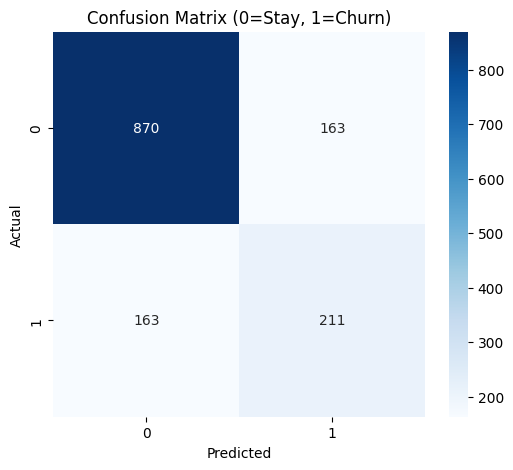


--- Top Business Drivers for Churn ---
1. MonthlyCharges (Importance: 0.1409)
2. TotalCharges (Importance: 0.1378)
3. Contract (Importance: 0.1356)
4. tenure (Importance: 0.1203)
5. OnlineSecurity (Importance: 0.0862)

Insight: Focus retention efforts on customers with high values in these categories.


In [ ]:
"""
Project: Telco Customer Churn Prediction
Author: Sanskruti
Description: A Random Forest classifier to predict customer churn.
             Uses SMOTE to handle class imbalance and provides actionable business insights.
"""

# --- 1. Setup & Libraries ---
# !pip install imbalanced-learn pandas numpy matplotlib seaborn scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn for Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Imbalanced-learn for SMOTE (Synthetic Minority Over-sampling Technique)
from imblearn.over_sampling import SMOTE

# --- 2. Data Loading & Cleaning ---
print("Loading Telco Customer Data...")
url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
df = pd.read_csv(url)

# Convert 'TotalCharges' to numeric (it has some blank strings)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True) # Drop the ~11 rows with missing values

# Drop ID column (it's unique per user and has no predictive value)
df = df.drop('customerID', axis=1)

# Encode Categorical Variables (Text -> Numbers)
# e.g., "Yes" -> 1, "No" -> 0
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

print(f"Data Loaded: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"Churn Rate: {df['Churn'].mean():.2%}")

# --- 3. Preprocessing & SMOTE ---
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE *ONLY* to Training Data
# We don't touch the Test data because we want to test on the "real" imbalanced world
print("\nApplying SMOTE to handle class imbalance...")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Original Training Size: {len(X_train)} (Churners: {sum(y_train)})")
print(f"Resampled Training Size: {len(X_train_resampled)} (Churners: {sum(y_train_resampled)})")

# --- 4. Model Training ---
print("\nTraining Random Forest Model...")
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# --- 5. Evaluation ---
y_pred = model.predict(X_test)

print("\n--- Model Performance ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visualization
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (0=Stay, 1=Churn)")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# --- 6. Business Insights (Feature Importance) ---
print("\n--- Top Business Drivers for Churn ---")
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Display Top 5
for f in range(5):
    print(f"{f+1}. {X.columns[indices[f]]} (Importance: {importances[indices[f]]:.4f})")

print("\nInsight: Focus retention efforts on customers with high values in these categories.")